In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('default')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [9]:
domain_df = pd.read_csv("../input/domain.csv")
fundamentals_df = pd.read_csv("../input/fundamentals.csv")
price_df = pd.read_csv("../input/sp500.csv")

### Domain Analysis

In [3]:
domain_df.head()

,Symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology


GICS Sector
Industrials               78
Financials                75
Information Technology    68
Health Care               60
Consumer Discretionary    51
Consumer Staples          37
Utilities                 31
Real Estate               31
Materials                 26
Communication Services    23
Energy                    22
Name: count, dtype: int64


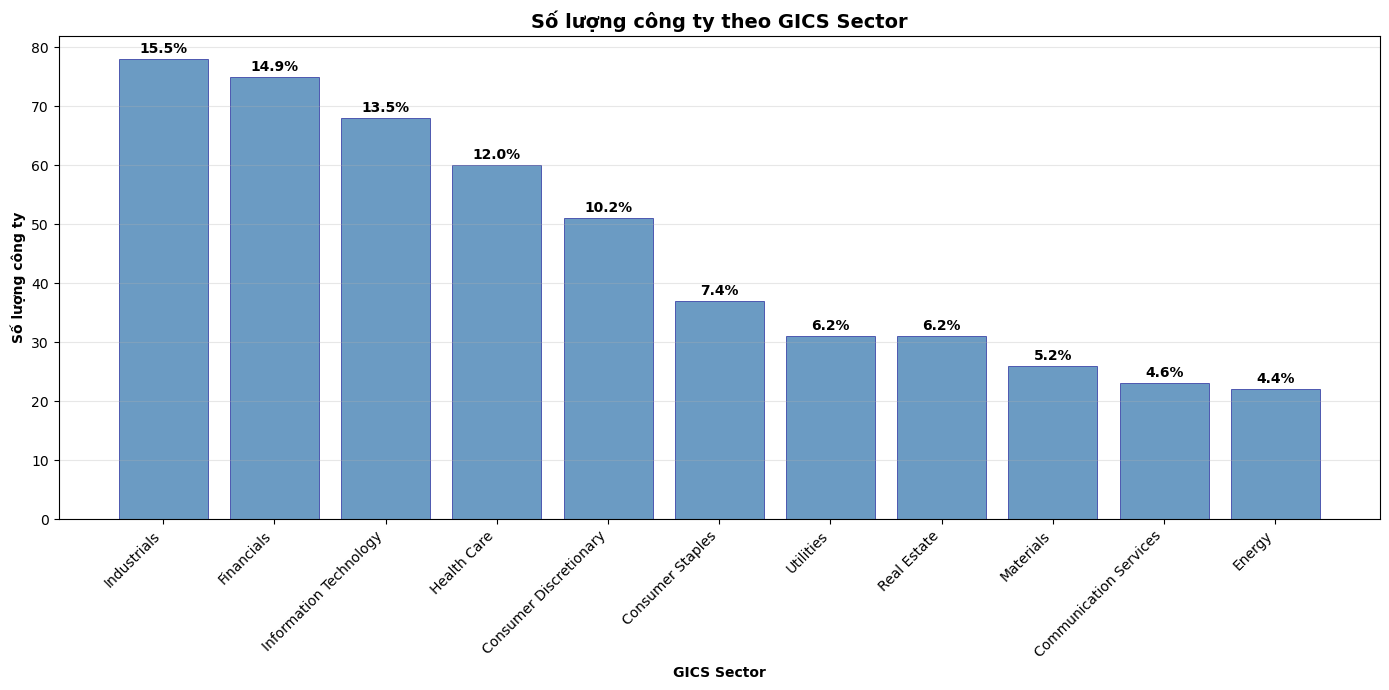

In [6]:
sector_counts = domain_df['GICS Sector'].value_counts()
print(sector_counts)

plt.figure(figsize=(14, 7))
bars = plt.bar(range(len(sector_counts)), sector_counts.values, 
               color='steelblue', alpha=0.8, edgecolor='darkblue', linewidth=0.5)

total_companies = len(domain_df)
for i, (count, bar) in enumerate(zip(sector_counts.values, bars)):
    percentage = (count / total_companies) * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.title('Số lượng công ty theo GICS Sector', fontsize=14, fontweight='bold')
plt.xlabel('GICS Sector', fontweight='bold')
plt.ylabel('Số lượng công ty', fontweight='bold')
plt.xticks(range(len(sector_counts)), sector_counts.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Fundamental Analysis

Dữ liệu thiếu theo cột:
                      Column  Missing_Count  Missing_Percent
12  fiveYearAvgDividendYield            110        21.912351
1                 trailingPE             24         4.780876
4        enterpriseToRevenue              5         0.996016
8                       beta              5         0.996016
7                 forwardEps              4         0.796813
2                  forwardPE              1         0.199203
3                priceToBook              1         0.199203
5              profitMargins              1         0.199203
6                trailingEps              1         0.199203
9               52WeekChange              1         0.199203
10             averageVolume              1         0.199203
11                 marketCap              1         0.199203
13               payoutRatio              1         0.199203


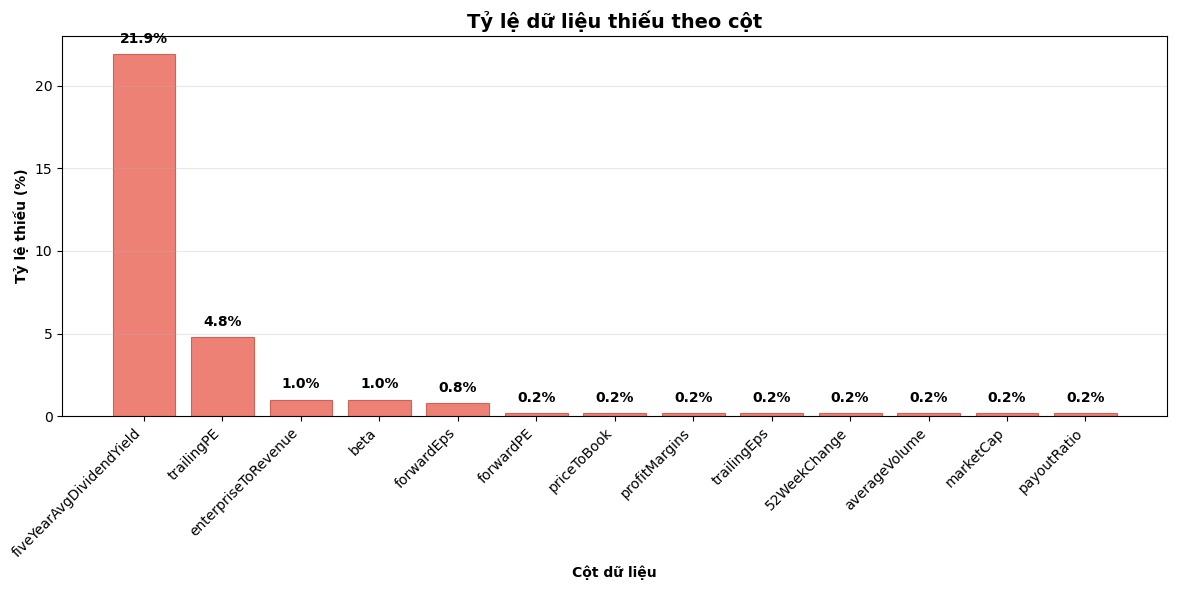

In [ ]:
missing_data = fundamentals_df.isnull().sum()
missing_percent = (missing_data / len(fundamentals_df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percent': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

print("Dữ liệu thiếu theo cột:")
print(missing_df)

# Trực quan hóa dữ liệu thiếu
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(missing_df)), missing_df['Missing_Percent'], 
                   color='#e74c3c', alpha=0.7, edgecolor='#c0392b', linewidth=0.8)
    
    # Thêm % trên cột
    for i, (percent, bar) in enumerate(zip(missing_df['Missing_Percent'], bars)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 f'{percent:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    plt.title('Tỷ lệ dữ liệu thiếu theo cột', fontsize=14, fontweight='bold')
    plt.xlabel('Cột dữ liệu', fontweight='bold')
    plt.ylabel('Tỷ lệ thiếu (%)', fontweight='bold')
    plt.xticks(range(len(missing_df)), missing_df['Column'], rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Không có dữ liệu thiếu")

In [14]:
fundamentals_clear_df = fundamentals_df.drop(columns=['fiveYearAvgDividendYield','trailingPE'])
fundamentals_clear_df.dropna(axis=0, how='any', inplace=True)
fundamentals_clear_df.shape

(490, 12)

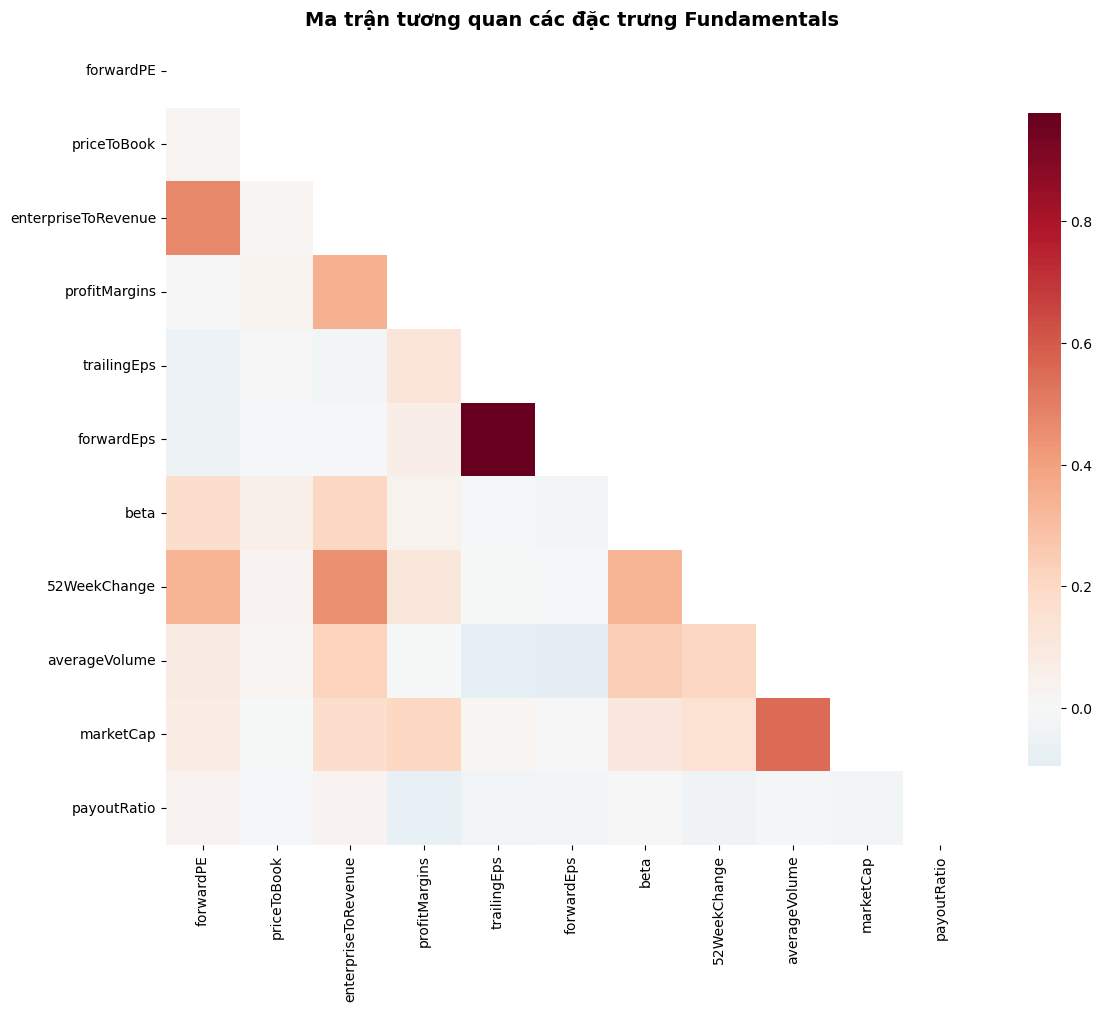


Các cặp đặc trưng có tương quan cao (>0.5):
       Feature_1   Feature_2  Correlation
0    trailingEps  forwardEps        0.978
1  averageVolume   marketCap        0.557


In [15]:
# Ma trận tương quan giữa các đặc trưng
numeric_cols = fundamentals_clear_df.select_dtypes(include=[np.number]).columns
corr_matrix = fundamentals_clear_df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Ma trận tương quan các đặc trưng Fundamentals', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Tìm các cặp tương quan cao
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            high_corr_pairs.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Correlation': round(corr_val, 3)
            })

high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
print("\nCác cặp đặc trưng có tương quan cao (>0.5):")
print(high_corr_df)

Số lượng Symbol sau khi merge: 490

Thống kê các chỉ số theo Sector:
                           marketCap                             profitMargins                 beta               forwardPE                 priceToBook                
                                mean        median           std          mean median    std   mean median    std      mean  median     std        mean median      std
GICS Sector                                                                                                                                                            
Communication Services  3.247100e+11  3.978435e+10  7.113540e+11         0.104  0.139  0.215  1.040  1.018  0.383    17.196  21.236  29.589       7.918  2.427   25.096
Consumer Discretionary  1.235773e+11  3.800896e+10  3.629664e+11         0.109  0.092  0.088  1.266  1.234  0.486    23.496  20.640  21.783       1.860  5.614   21.255
Consumer Staples        9.221219e+10  3.247947e+10  1.584464e+11         0.070  0.084  0.11

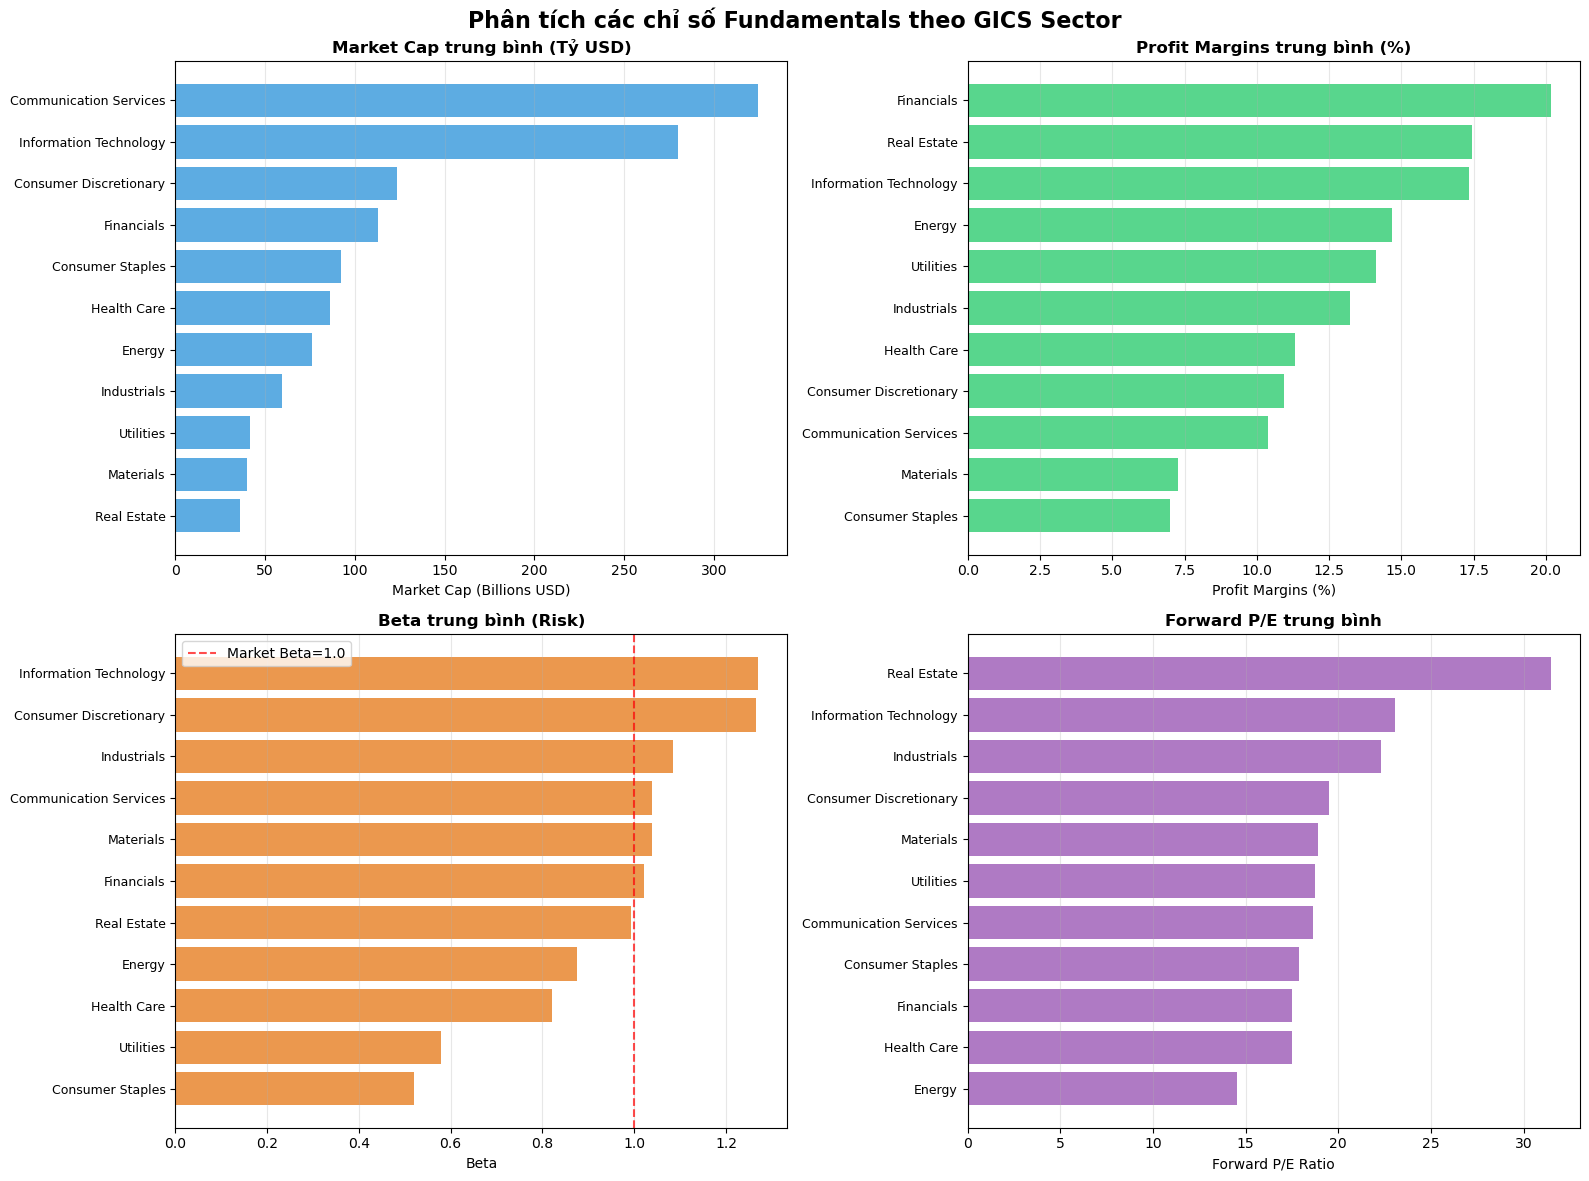


Ranking các Sector:

MARKETCAP:
  Top 3: ['Communication Services', 'Information Technology', 'Consumer Discretionary']
  Bottom 3: ['Utilities', 'Materials', 'Real Estate']

PROFITMARGINS:
  Top 3: ['Financials', 'Real Estate', 'Information Technology']
  Bottom 3: ['Communication Services', 'Materials', 'Consumer Staples']

BETA:
  Top 3: ['Information Technology', 'Consumer Discretionary', 'Industrials']
  Bottom 3: ['Health Care', 'Utilities', 'Consumer Staples']

FORWARDPE:
  Top 3: ['Real Estate', 'Information Technology', 'Industrials']
  Bottom 3: ['Financials', 'Communication Services', 'Energy']

PRICETOBOOK:
  Top 3: ['Information Technology', 'Communication Services', 'Consumer Staples']
  Bottom 3: ['Consumer Discretionary', 'Real Estate', 'Health Care']


In [20]:
merged_df = fundamentals_clear_df.merge(domain_df, on='Symbol', how='inner')
print(f"Số lượng Symbol sau khi merge: {len(merged_df)}")

key_metrics = ['marketCap', 'profitMargins', 'beta', 'forwardPE', 'priceToBook']
available_metrics = [col for col in key_metrics if col in merged_df.columns]

sector_stats = merged_df.groupby('GICS Sector')[available_metrics].agg(['mean', 'median', 'std']).round(3)
print("\nThống kê các chỉ số theo Sector:")
print(sector_stats)

# Trực quan hóa các chỉ số quan trọng theo Sector
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Phân tích các chỉ số Fundamentals theo GICS Sector', fontsize=16, fontweight='bold')

# 1. Market Cap trung bình theo Sector
if 'marketCap' in available_metrics:
    sector_marketcap = merged_df.groupby('GICS Sector')['marketCap'].mean().sort_values(ascending=True)
    bars1 = axes[0,0].barh(range(len(sector_marketcap)), sector_marketcap.values/1e9, 
                           color='#3498db', alpha=0.8)
    axes[0,0].set_title('Market Cap trung bình (Tỷ USD)', fontweight='bold')
    axes[0,0].set_xlabel('Market Cap (Billions USD)')
    axes[0,0].set_yticks(range(len(sector_marketcap)))
    axes[0,0].set_yticklabels(sector_marketcap.index, fontsize=9)
    axes[0,0].grid(axis='x', alpha=0.3)

# 2. Profit Margins trung bình theo Sector
if 'profitMargins' in available_metrics:
    sector_margins = merged_df.groupby('GICS Sector')['profitMargins'].mean().sort_values(ascending=True)
    bars2 = axes[0,1].barh(range(len(sector_margins)), sector_margins.values*100, 
                           color='#2ecc71', alpha=0.8)
    axes[0,1].set_title('Profit Margins trung bình (%)', fontweight='bold')
    axes[0,1].set_xlabel('Profit Margins (%)')
    axes[0,1].set_yticks(range(len(sector_margins)))
    axes[0,1].set_yticklabels(sector_margins.index, fontsize=9)
    axes[0,1].grid(axis='x', alpha=0.3)

# 3. Beta trung bình theo Sector
if 'beta' in available_metrics:
    sector_beta = merged_df.groupby('GICS Sector')['beta'].mean().sort_values(ascending=True)
    bars3 = axes[1,0].barh(range(len(sector_beta)), sector_beta.values, 
                           color='#e67e22', alpha=0.8)
    axes[1,0].set_title('Beta trung bình (Risk)', fontweight='bold')
    axes[1,0].set_xlabel('Beta')
    axes[1,0].set_yticks(range(len(sector_beta)))
    axes[1,0].set_yticklabels(sector_beta.index, fontsize=9)
    axes[1,0].axvline(x=1.0, color='red', linestyle='--', alpha=0.7, label='Market Beta=1.0')
    axes[1,0].legend()
    axes[1,0].grid(axis='x', alpha=0.3)

# 4. P/E Ratio trung bình theo Sector
if 'forwardPE' in available_metrics:
    pe_data = merged_df[merged_df['forwardPE'].between(0, 50)]  # Lọc outliers
    sector_pe = pe_data.groupby('GICS Sector')['forwardPE'].mean().sort_values(ascending=True)
    bars4 = axes[1,1].barh(range(len(sector_pe)), sector_pe.values, 
                           color='#9b59b6', alpha=0.8)
    axes[1,1].set_title('Forward P/E trung bình', fontweight='bold')
    axes[1,1].set_xlabel('Forward P/E Ratio')
    axes[1,1].set_yticks(range(len(sector_pe)))
    axes[1,1].set_yticklabels(sector_pe.index, fontsize=9)
    axes[1,1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Top và Bottom sectors cho từng metric
print("\nRanking các Sector:")
for metric in available_metrics:
    if metric in merged_df.columns:
        sector_ranking = merged_df.groupby('GICS Sector')[metric].mean().sort_values(ascending=False)
        print(f"\n{metric.upper()}:")
        print(f"  Top 3: {list(sector_ranking.head(3).index)}")
        print(f"  Bottom 3: {list(sector_ranking.tail(3).index)}")

### Stock Price Analysis

In [23]:
selected_stocks = fundamentals_clear_df['Symbol'].tolist()

In [26]:
# Lọc dữ liệu giá cho các stocks đã chọn
price_selected = price_df[price_df['Symbol'].isin(selected_stocks)].copy()
price_selected['Date'] = pd.to_datetime(price_selected['Date'])
price_selected = price_selected.sort_values(['Symbol', 'Date'])

print(f"Số stocks được phân tích: {price_selected['Symbol'].nunique()}")
print(f"Khoảng thời gian: {price_selected['Date'].min()} đến {price_selected['Date'].max()}")
print(f"Tổng số records: {len(price_selected)}")

# Tính toán các chỉ số biến động
price_selected = price_selected.sort_values(['Symbol', 'Date'])
price_selected['Daily_Return'] = price_selected.groupby('Symbol')['Close'].pct_change()

# Tính volatility và price change cho từng symbol
volatility_list = []
for symbol in price_selected['Symbol'].unique():
    symbol_data = price_selected[price_selected['Symbol'] == symbol].copy()
    symbol_data['Volatility_30d'] = symbol_data['Daily_Return'].rolling(30).std() * np.sqrt(252)
    symbol_data['Price_Change_30d'] = symbol_data['Close'].pct_change(30)
    volatility_list.append(symbol_data)

price_selected = pd.concat(volatility_list, ignore_index=True)

# Thống kê tổng quan về biến động
volatility_stats = price_selected.groupby('Symbol').agg({
    'Daily_Return': ['mean', 'std'],
    'Close': ['min', 'max'],
    'Volume': 'mean'
}).round(4)

volatility_stats.columns = ['Avg_Return', 'Volatility', 'Min_Price', 'Max_Price', 'Avg_Volume']
volatility_stats['Price_Range_Pct'] = ((volatility_stats['Max_Price'] - volatility_stats['Min_Price']) / volatility_stats['Min_Price'] * 100).round(2)
volatility_stats = volatility_stats.sort_values('Volatility', ascending=False)

print("\nTop 10 stocks có volatility cao nhất:")
print(volatility_stats.head(10))

Số stocks được phân tích: 490
Khoảng thời gian: 2010-09-07 00:00:00-04:00 đến 2025-09-03 00:00:00-04:00
Tổng số records: 1765564

Top 10 stocks có volatility cao nhất:
        Avg_Return  Volatility  Min_Price  Max_Price    Avg_Volume  Price_Range_Pct
Symbol                                                                             
COIN        0.0014      0.0553     32.530    419.780  1.107094e+07          1190.44
ENPH        0.0017      0.0504      0.700    336.000  2.533620e+06         47900.00
MRNA        0.0012      0.0456     12.260    484.470  8.305617e+06          3851.63
PLTR        0.0033      0.0454      6.000    186.970  6.008934e+07          3016.17
TTD         0.0022      0.0438      2.280    139.510  9.239348e+06          6018.86
SMCI        0.0017      0.0388      0.790    118.807  1.274197e+07         14938.86
CZR         0.0013      0.0369      3.890    119.490  2.414725e+06          2971.72
DDOG        0.0015      0.0369     28.040    196.560  4.283723e+06          

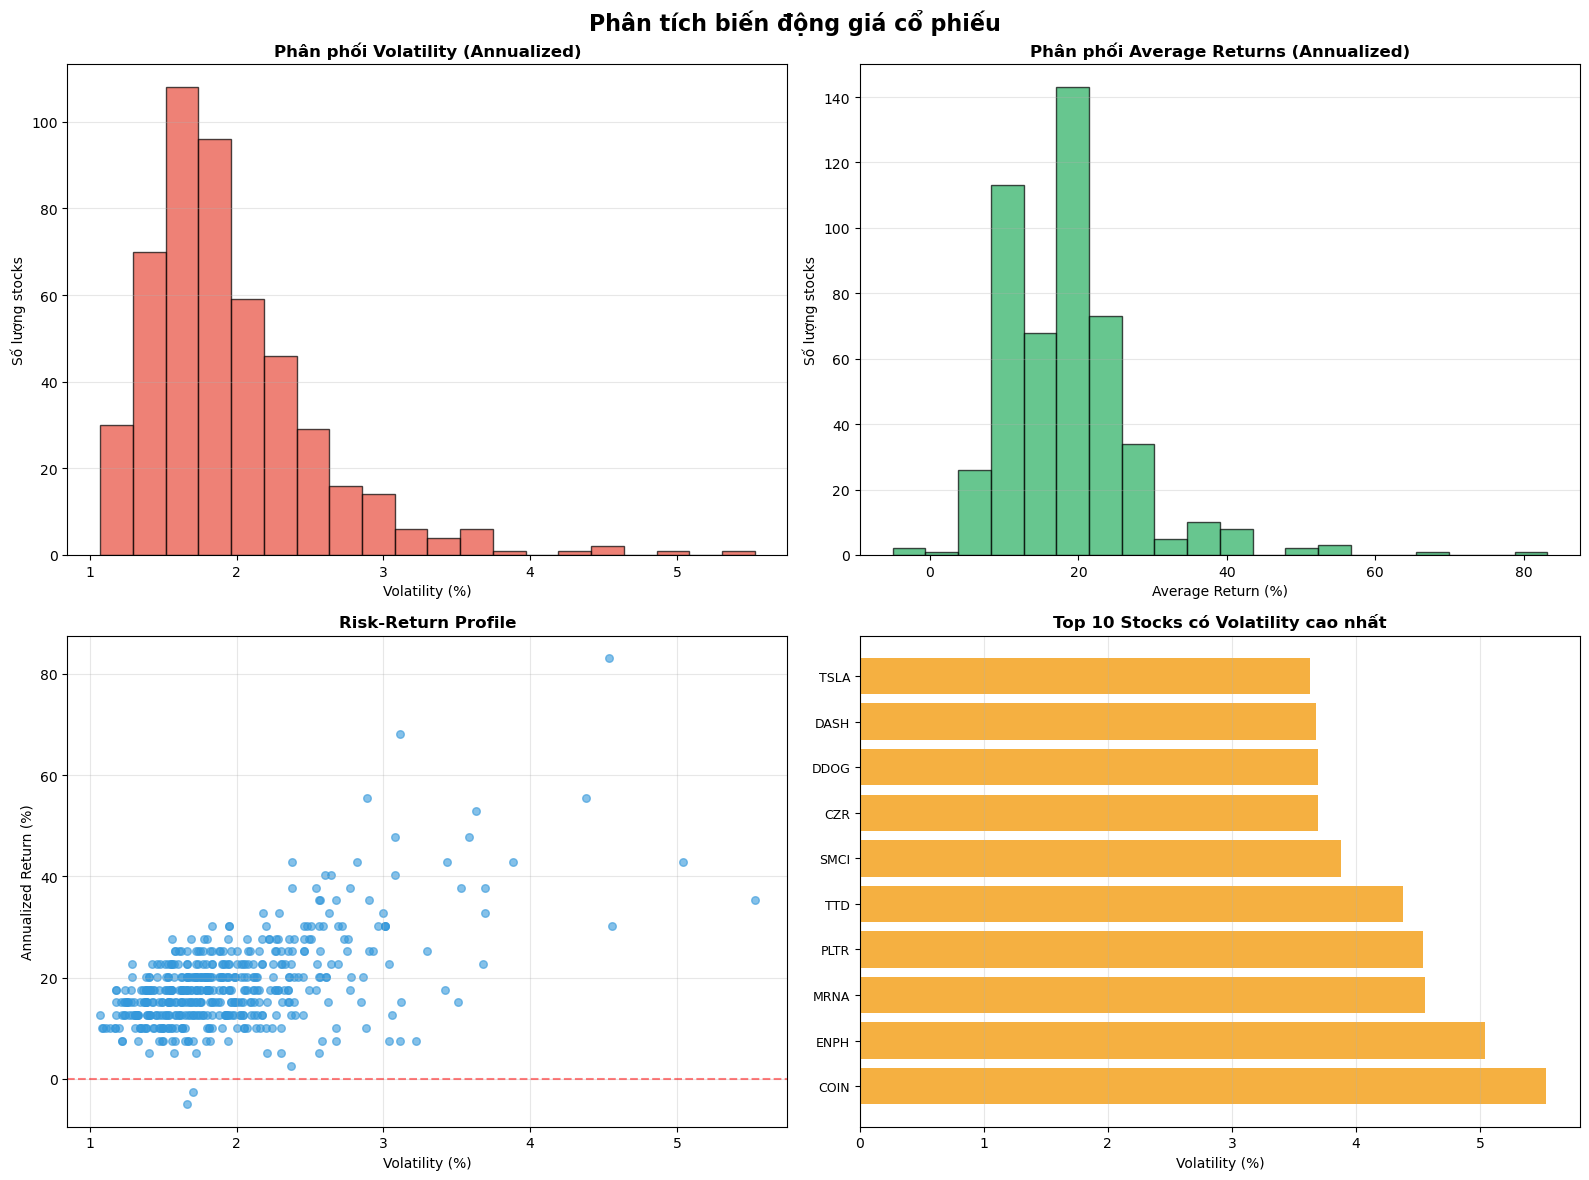


Phân tích time series cho 5 stocks có volatility cao:


In [29]:
# Trực quan hóa biến động giá
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Phân tích biến động giá cổ phiếu', fontsize=16, fontweight='bold')

# 1. Phân phối volatility
axes[0,0].hist(volatility_stats['Volatility']*100, bins=20, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Phân phối Volatility (Annualized)', fontweight='bold')
axes[0,0].set_xlabel('Volatility (%)')
axes[0,0].set_ylabel('Số lượng stocks')
axes[0,0].grid(axis='y', alpha=0.3)

# 2. Phân phối Average Returns
clean_returns = volatility_stats['Avg_Return'].dropna() * 252 * 100  # Annualized
axes[0,1].hist(clean_returns, bins=20, color='#27ae60', alpha=0.7, edgecolor='black')
axes[0,1].set_title('Phân phối Average Returns (Annualized)', fontweight='bold')
axes[0,1].set_xlabel('Average Return (%)')
axes[0,1].set_ylabel('Số lượng stocks')
axes[0,1].grid(axis='y', alpha=0.3)

# 3. Risk-Return scatter plot
axes[1,0].scatter(volatility_stats['Volatility']*100, volatility_stats['Avg_Return']*252*100, 
                  alpha=0.6, s=30, color='#3498db')
axes[1,0].set_title('Risk-Return Profile', fontweight='bold')
axes[1,0].set_xlabel('Volatility (%)')
axes[1,0].set_ylabel('Annualized Return (%)')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].axhline(y=0, color='red', linestyle='--', alpha=0.5)

# 4. Top 10 stocks volatility cao nhất
top10_vol = volatility_stats.head(10)
bars = axes[1,1].barh(range(len(top10_vol)), top10_vol['Volatility']*100, 
                      color='#f39c12', alpha=0.8)
axes[1,1].set_title('Top 10 Stocks có Volatility cao nhất', fontweight='bold')
axes[1,1].set_xlabel('Volatility (%)')
axes[1,1].set_yticks(range(len(top10_vol)))
axes[1,1].set_yticklabels(top10_vol.index, fontsize=9)
axes[1,1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Phân tích theo time series cho một vài stocks tiêu biểu
sample_stocks = volatility_stats.head(5).index.tolist()  # Top 5 volatile stocks
print(f"\nPhân tích time series cho {len(sample_stocks)} stocks có volatility cao:")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


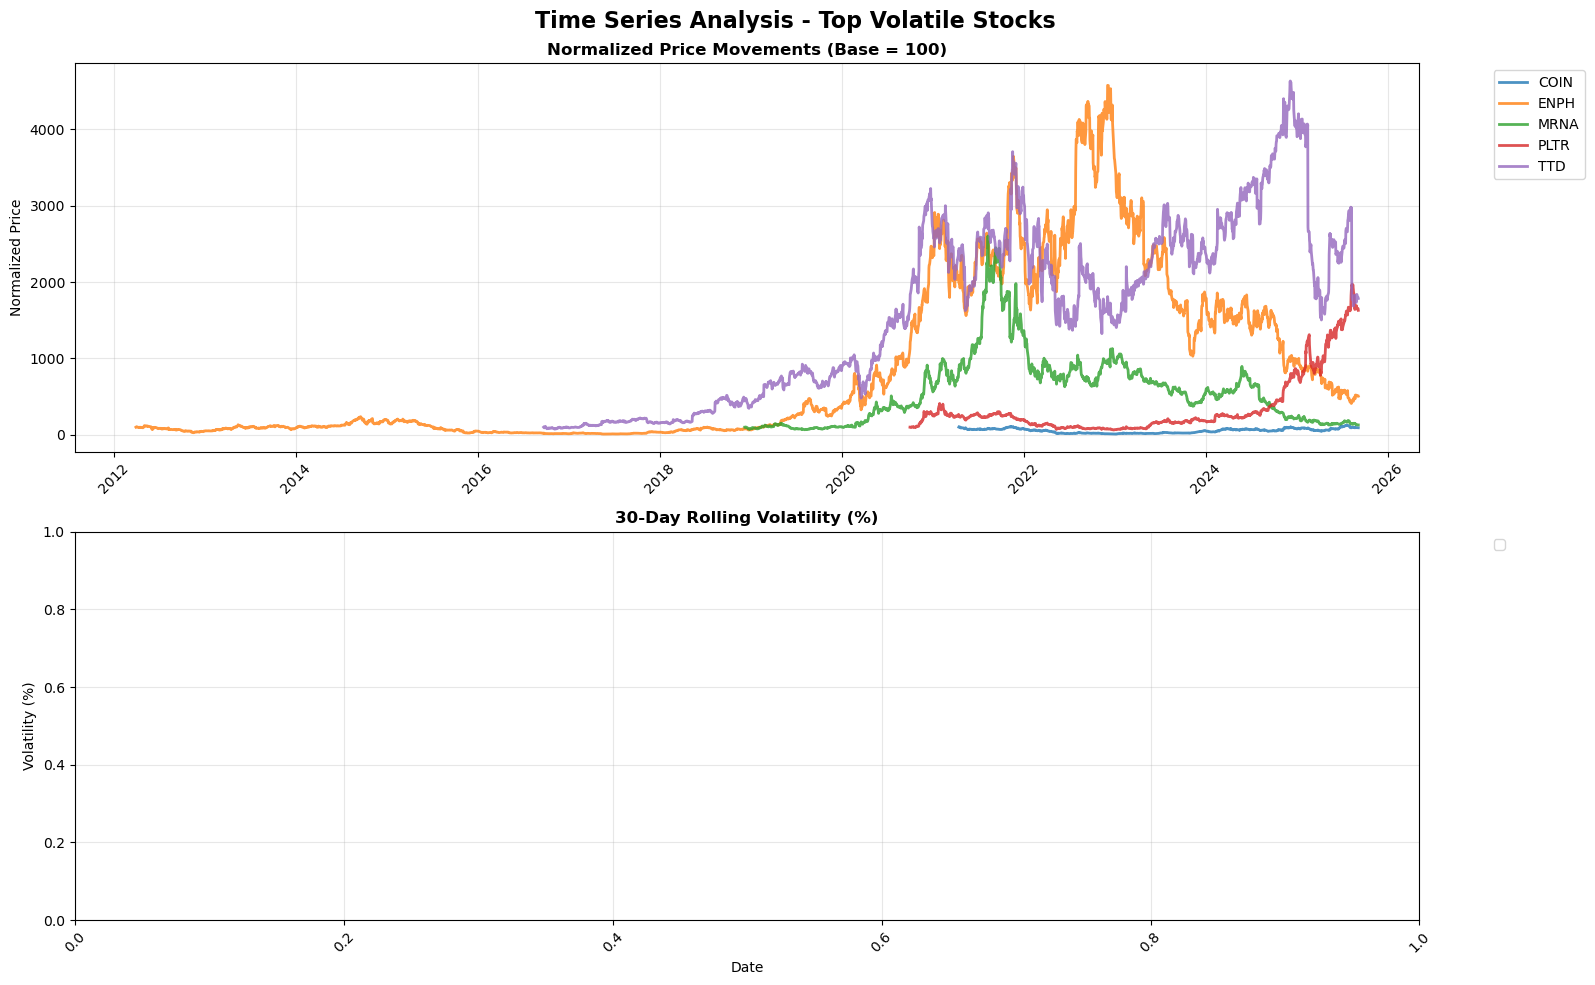


=== TỔNG KẾT PHÂN TÍCH BIẾN ĐỘNG GIÁ ===
Tổng số stocks được phân tích: 490
Volatility trung bình: 1.95%
Average return trung bình: 18.76%
Stock có volatility cao nhất: COIN (5.53%)
Stock có volatility thấp nhất: JNJ (1.07%)


In [33]:
# Time series analysis cho stocks có volatility cao
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Time Series Analysis - Top Volatile Stocks', fontsize=16, fontweight='bold')

# 1. Price movements
for stock in sample_stocks:
    stock_data = price_selected[price_selected['Symbol'] == stock]
    stock_data = stock_data.sort_values('Date')
    
    # Normalize prices to start at 100 for comparison
    normalized_price = (stock_data['Close'] / stock_data['Close'].iloc[0]) * 100
    axes[0].plot(stock_data['Date'], normalized_price, linewidth=2, label=stock, alpha=0.8)

axes[0].set_title('Normalized Price Movements (Base = 100)', fontweight='bold')
axes[0].set_ylabel('Normalized Price')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# 2. Rolling volatility comparison
for stock in sample_stocks:
    stock_data = price_selected[price_selected['Symbol'] == stock]
    stock_data = stock_data.sort_values('Date')
    
    # Calculate 30-day rolling volatility
    returns = stock_data['Close'].pct_change().dropna()
    rolling_vol = returns.rolling(30).std() * np.sqrt(252) * 100
    
    # Ensure matching indices for plotting
    valid_dates = stock_data['Date'].iloc[30:len(rolling_vol)+30]
    valid_vol = rolling_vol.iloc[30:].dropna()
    
    if len(valid_dates) == len(valid_vol):
        axes[1].plot(valid_dates, valid_vol, linewidth=2, label=stock, alpha=0.8)

axes[1].set_title('30-Day Rolling Volatility (%)', fontweight='bold')
axes[1].set_ylabel('Volatility (%)')
axes[1].set_xlabel('Date')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== TỔNG KẾT PHÂN TÍCH BIẾN ĐỘNG GIÁ ===")
print(f"Tổng số stocks được phân tích: {len(volatility_stats)}")
print(f"Volatility trung bình: {volatility_stats['Volatility'].mean()*100:.2f}%")
print(f"Average return trung bình: {volatility_stats['Avg_Return'].mean()*252*100:.2f}%")
print(f"Stock có volatility cao nhất: {volatility_stats.index[0]} ({volatility_stats['Volatility'].iloc[0]*100:.2f}%)")
print(f"Stock có volatility thấp nhất: {volatility_stats.index[-1]} ({volatility_stats['Volatility'].iloc[-1]*100:.2f}%)")

In [39]:
price_df['Date'] = pd.to_datetime(price_df['Date'], utc=True)

# Tìm symbols có dữ liệu từ 2010
symbols_from_2010 = []
for symbol in price_df['Symbol'].unique():
    symbol_data = price_df[price_df['Symbol'] == symbol]
    start_year = symbol_data['Date'].min().year
    if start_year <= 2010:
        symbols_from_2010.append(symbol)

print(f"Số symbols có dữ liệu từ 2010: {len(symbols_from_2010)}")
print(f"Tổng số symbols: {price_df['Symbol'].nunique()}")
print(f"\nDanh sách symbols từ 2010:")
print(symbols_from_2010)

Số symbols có dữ liệu từ 2010: 434
Tổng số symbols: 501

Danh sách symbols từ 2010:
['MMM', 'AOS', 'ABT', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALB', 'ARE', 'ALGN', 'LNT', 'ALL', 'GOOGL', 'MO', 'AMZN', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'AON', 'APA', 'AAPL', 'AMAT', 'ACGL', 'ADM', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK-B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CPAY', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 'DVA', 'DECK', 'DE', 'DAL', 'DVN', 'DXCM', 'DLR', 'DG', 'DLTR',

In [44]:
valid_symbols = [symbol for symbol in symbols_from_2010 if symbol in selected_stocks]

In [ ]:
# Lọc dữ liệu cho valid symbols
valid_price_df = price_df[price_df['Symbol'].isin(valid_symbols)].copy()
valid_price_df['Date'] = pd.to_datetime(valid_price_df['Date'], utc=True)
valid_price_df = valid_price_df.sort_values(['Symbol', 'Date'])

# Tính các chỉ số theo chu kỳ
valid_price_df['Year'] = valid_price_df['Date'].dt.year
valid_price_df['Month'] = valid_price_df['Date'].dt.month
valid_price_df['Quarter'] = valid_price_df['Date'].dt.quarter
valid_price_df['Daily_Return'] = valid_price_df.groupby('Symbol')['Close'].pct_change()

# Phân tích theo năm
yearly_stats = valid_price_df.groupby(['Symbol', 'Year']).agg({
    'Daily_Return': ['mean', 'std'],
    'Volume': 'mean',
    'Close': ['first', 'last']
}).round(4)

yearly_stats.columns = ['Avg_Return', 'Volatility', 'Avg_Volume', 'Start_Price', 'End_Price']
yearly_stats['Annual_Return'] = ((yearly_stats['End_Price'] / yearly_stats['Start_Price']) - 1) * 100
yearly_stats = yearly_stats.reset_index()

# Top performers mỗi năm
top_yearly = yearly_stats.groupby('Year')['Annual_Return'].agg(['max', 'min', 'mean']).round(2)

# Phân tích theo quý
quarterly_stats = valid_price_df.groupby(['Year', 'Quarter'])['Daily_Return'].agg(['mean', 'std']).round(4)
quarterly_stats.columns = ['Avg_Return', 'Volatility']
quarterly_stats['Annualized_Return'] = quarterly_stats['Avg_Return'] * 252 * 100

print(f"\nTop 3 năm có return cao nhất:")
print(top_yearly.nlargest(3, 'max'))

print(f"\nVolatility trung bình theo quý (2020-2024):")
recent_quarters = quarterly_stats.loc[2020:2024]
print(recent_quarters.groupby('Quarter')['Volatility'].mean().round(4))

Phân tích 428 symbols hợp lệ

Top 3 năm có return cao nhất:
         max    min   mean
Year                      
2020  720.05 -58.03  16.29
2013  325.43 -49.02  37.39
2016  309.39 -51.90  20.08

Volatility trung bình theo quý (2020-2024):
Quarter
1    0.0256
2    0.0220
3    0.0183
4    0.0199
Name: Volatility, dtype: float64


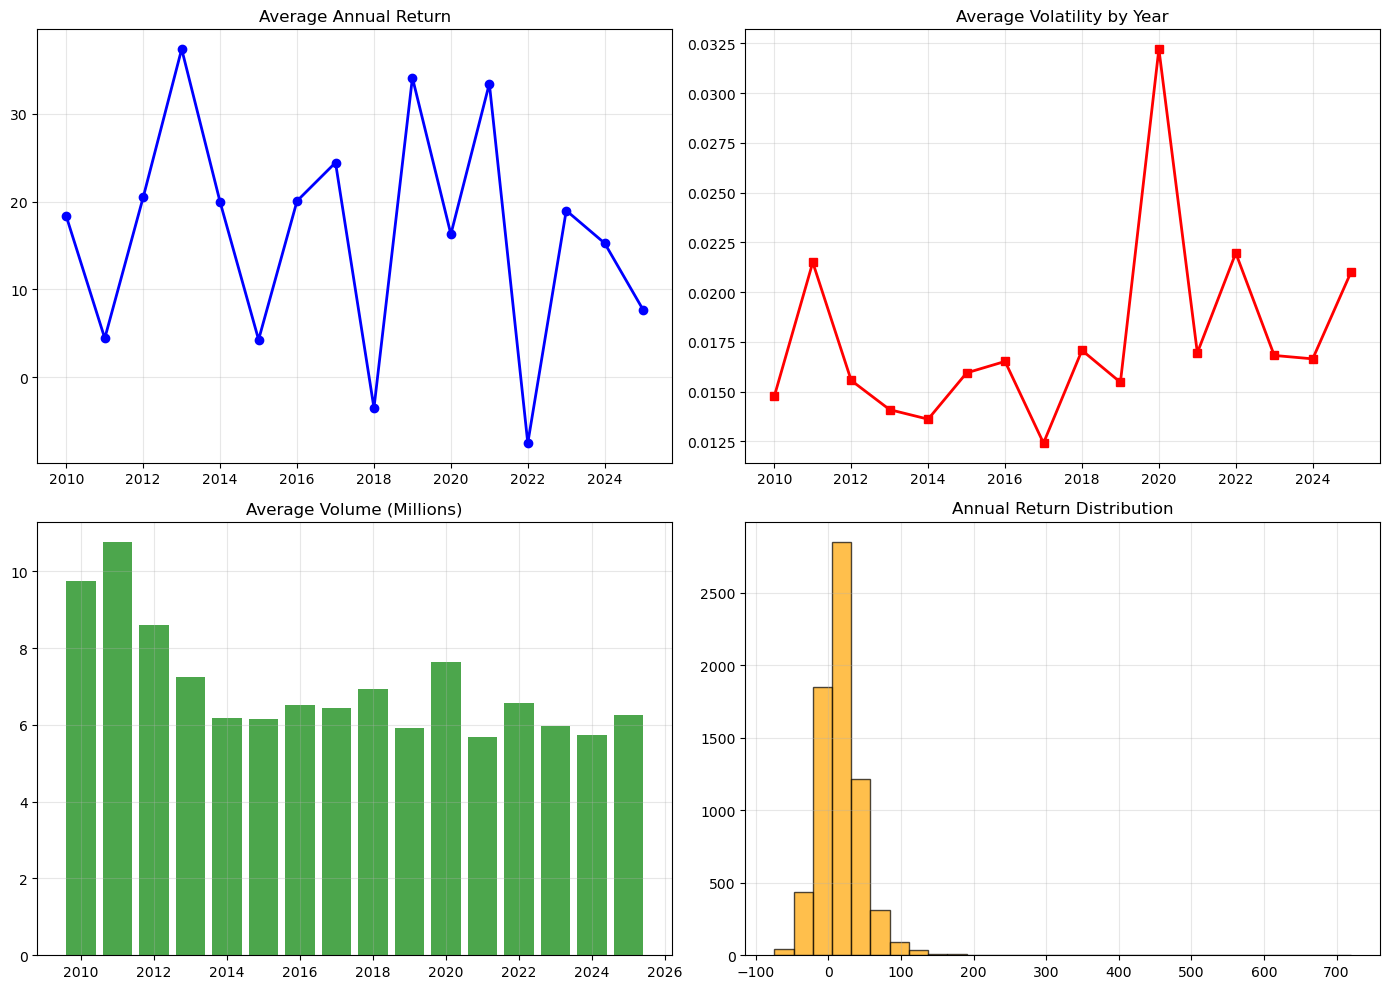

Năm khủng hoảng: [2020, 2022]
Năm tăng trưởng cao: [2020, 2013, 2016]


In [46]:
# Trực quan hóa chu kỳ
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Return theo năm
axes[0,0].plot(top_yearly.index, top_yearly['mean'], 'o-', color='blue', linewidth=2)
axes[0,0].set_title('Average Annual Return')
axes[0,0].grid(True, alpha=0.3)

# Volatility theo năm
yearly_vol = yearly_stats.groupby('Year')['Volatility'].mean()
axes[0,1].plot(yearly_vol.index, yearly_vol.values, 's-', color='red', linewidth=2)
axes[0,1].set_title('Average Volatility by Year')
axes[0,1].grid(True, alpha=0.3)

# Volume theo năm
yearly_volume = yearly_stats.groupby('Year')['Avg_Volume'].mean() / 1e6
axes[1,0].bar(yearly_volume.index, yearly_volume.values, color='green', alpha=0.7)
axes[1,0].set_title('Average Volume (Millions)')
axes[1,0].grid(True, alpha=0.3)

# Return distribution
all_returns = yearly_stats['Annual_Return'].dropna()
axes[1,1].hist(all_returns, bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Annual Return Distribution')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tóm tắt
crisis_years = [2008, 2020, 2022]
boom_years = top_yearly.nlargest(3, 'max').index.tolist()
print(f"Năm khủng hoảng: {[year for year in crisis_years if year in top_yearly.index]}")
print(f"Năm tăng trưởng cao: {boom_years}")

In [50]:
domain_clear_df = domain_df[domain_df['Symbol'].isin(valid_symbols)].copy()
fundamentals_clear_df = fundamentals_clear_df[fundamentals_clear_df['Symbol'].isin(valid_symbols)].copy()
sp500_clear_df = price_df[price_df['Symbol'].isin(valid_symbols)].copy()
sp500_clear_df['Date'] = pd.to_datetime(sp500_clear_df['Date'], utc=True)

In [51]:
domain_clear_df.to_csv('../input/clear_domain.csv')
fundamentals_clear_df.to_csv('../input/clear_fundamentals.csv')
sp500_clear_df.to_csv('../input/clear_sp500.csv')

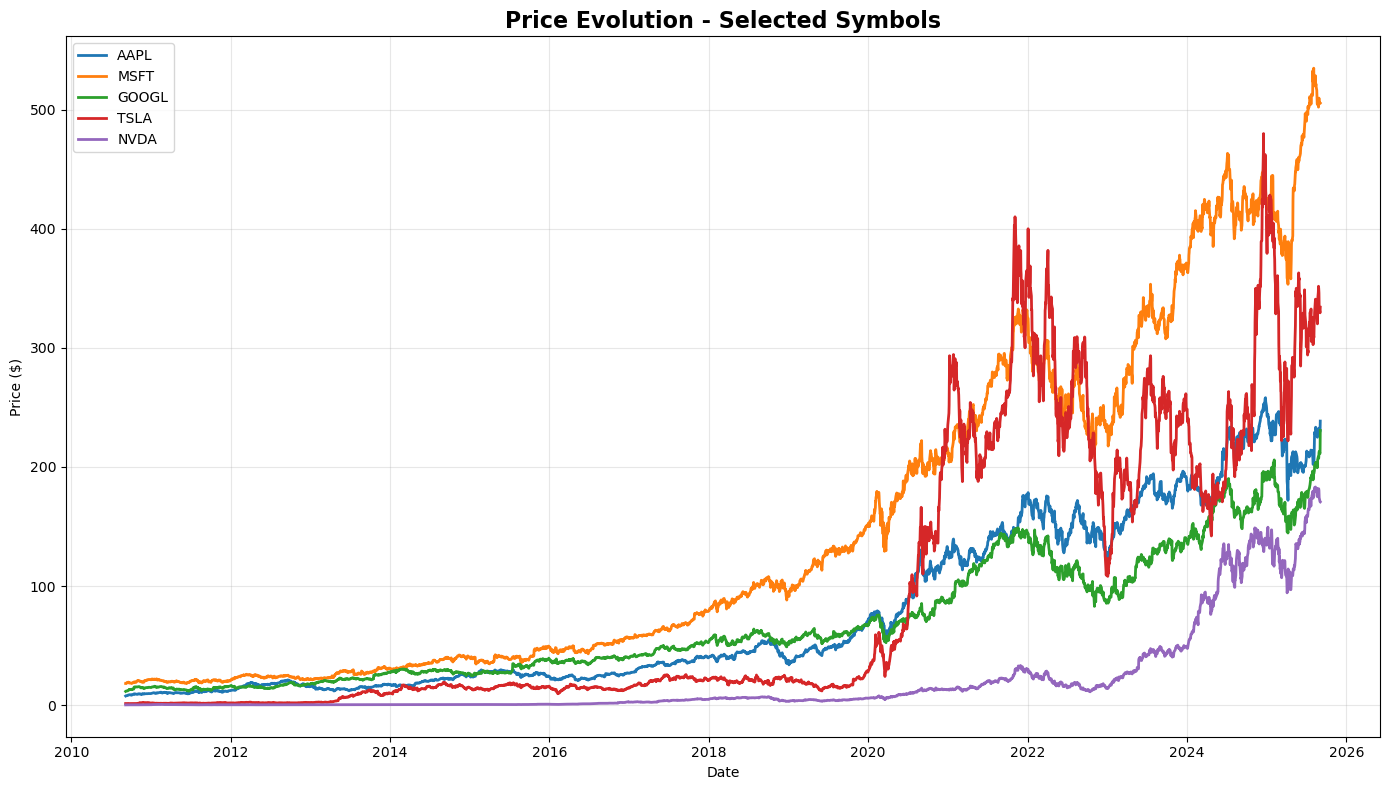

Symbols shown: ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA']
AAPL: $7.74 → $238.47 (+2981.2%)
MSFT: $18.20 → $505.35 (+2676.4%)
GOOGL: $11.55 → $230.66 (+1896.7%)
TSLA: $1.37 → $334.09 (+24298.0%)
NVDA: $0.23 → $170.62 (+74404.9%)
TSLA: $1.37 → $334.09 (+24298.0%)
NVDA: $0.23 → $170.62 (+74404.9%)


In [52]:
# Price Evolution của một số symbols chọn lọc
selected_symbols = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA']
available_symbols = [s for s in selected_symbols if s in sp500_clear_df['Symbol'].unique()]

plt.figure(figsize=(14, 8))
for symbol in available_symbols:
    data = sp500_clear_df[sp500_clear_df['Symbol'] == symbol].sort_values('Date')
    plt.plot(data['Date'], data['Close'], label=symbol, linewidth=2)

plt.title('Price Evolution - Selected Symbols', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Symbols shown: {available_symbols}")
for symbol in available_symbols:
    data = sp500_clear_df[sp500_clear_df['Symbol'] == symbol]
    start_price = data['Close'].iloc[0]
    end_price = data['Close'].iloc[-1]
    change_pct = ((end_price - start_price) / start_price) * 100
    print(f"{symbol}: ${start_price:.2f} → ${end_price:.2f} ({change_pct:+.1f}%)")